In [1]:
import pandas as pd

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
df = pd.read_csv('glass.csv')  #reading the file

In [48]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,1


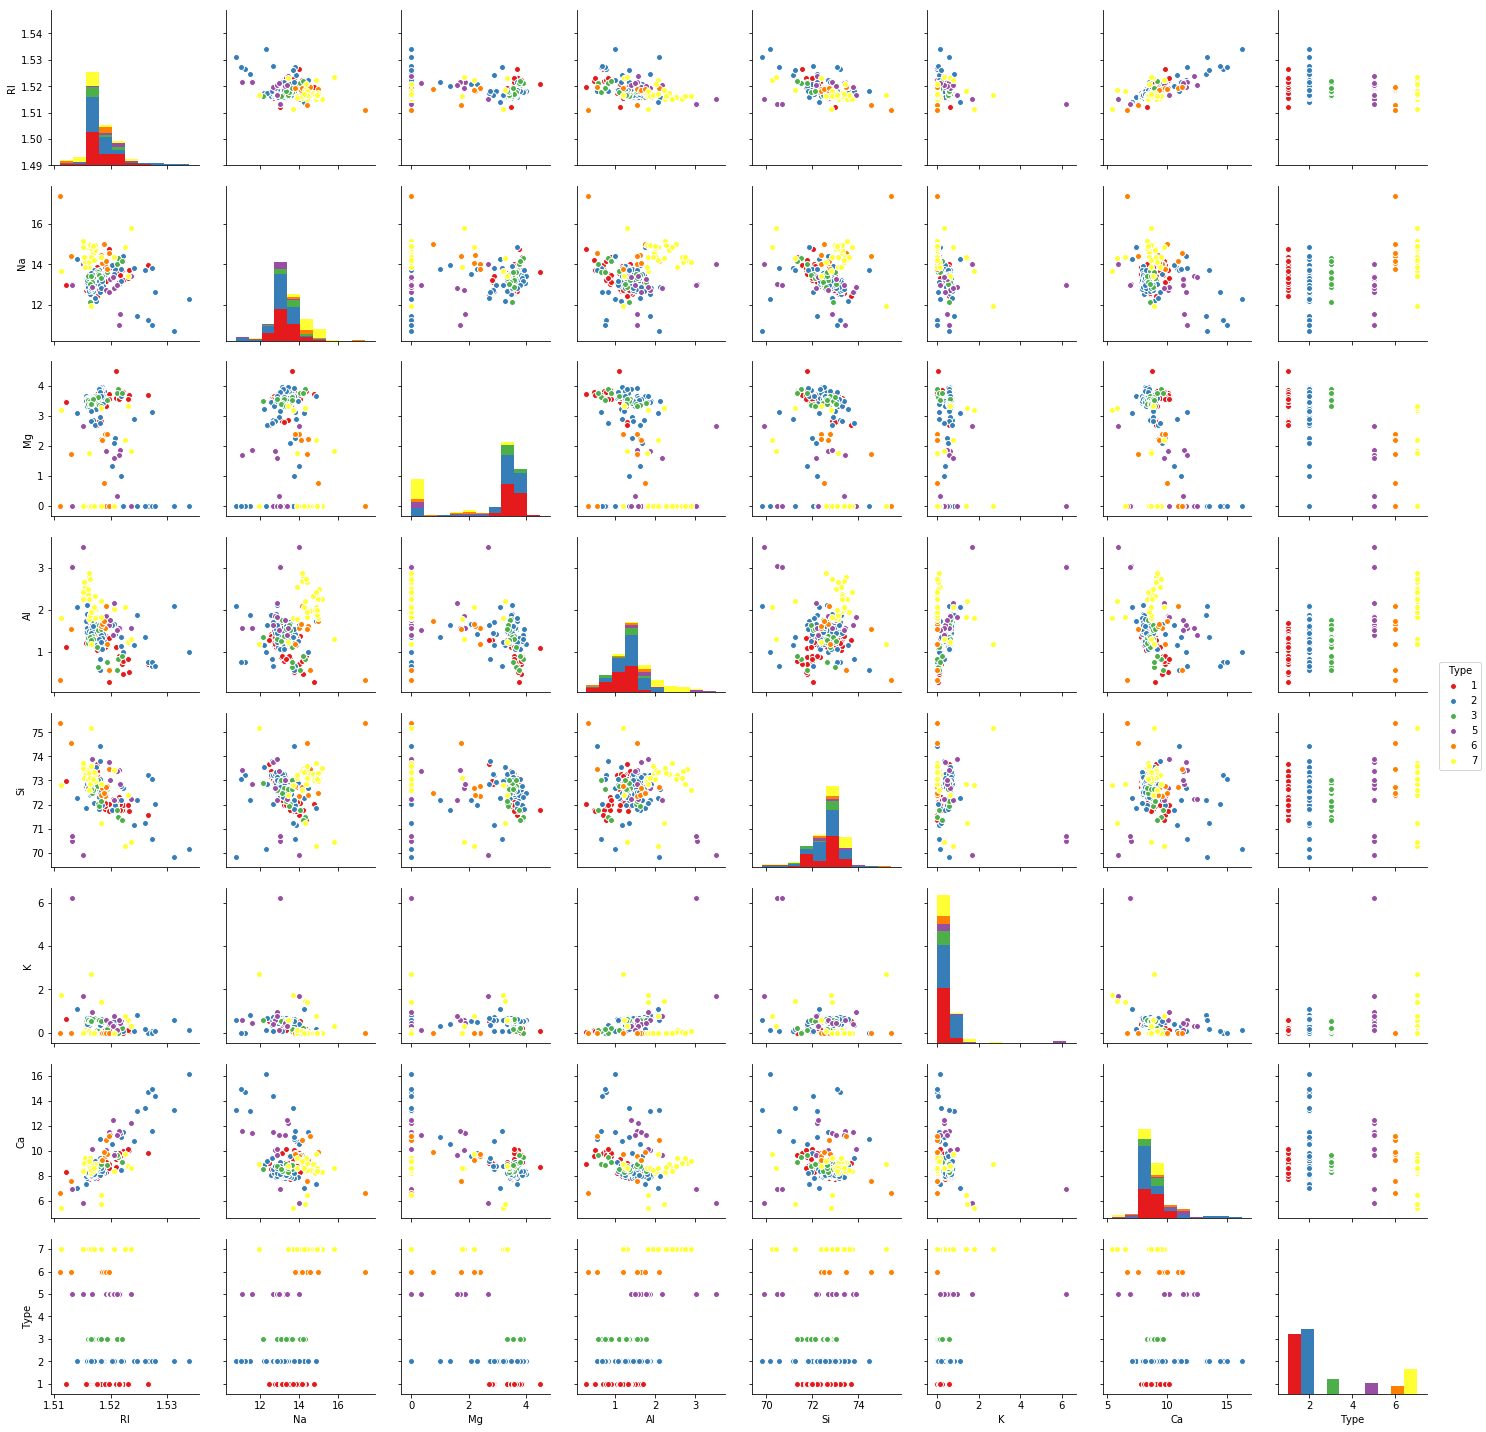

In [49]:
sns.pairplot(df, hue='Type', palette='Set1')  #visualization

In [51]:
#splitting the datatset for testing and training 
from sklearn.model_selection import train_test_split

In [52]:
X = df.drop('Type', axis=1)

In [53]:
y = df['Type']

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=100)

In [107]:
# Decision tree classifier
from sklearn.tree import DecisionTreeClassifier

In [108]:
dtree = DecisionTreeClassifier()

In [109]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [110]:
predictions = dtree.predict(X_test)

In [111]:
from sklearn.metrics import classification_report,confusion_matrix

In [112]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          1       0.74      0.82      0.78        17
          2       0.63      0.76      0.69        25
          3       0.25      0.33      0.29         3
          5       0.00      0.00      0.00         9
          6       0.50      0.33      0.40         3
          7       0.56      0.62      0.59         8

avg / total       0.54      0.62      0.57        65



In [113]:
print(confusion_matrix(y_test,predictions))

[[14  2  1  0  0  0]
 [ 3 19  1  1  0  1]
 [ 1  1  1  0  0  0]
 [ 0  6  0  0  0  3]
 [ 0  1  1  0  1  0]
 [ 1  1  0  0  1  5]]


In [114]:
#random Forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [115]:
rfc_pred = rfc.predict(X_test)

In [116]:
print(confusion_matrix(y_test,rfc_pred))

[[16  1  0  0  0  0]
 [ 4 20  1  0  0  0]
 [ 1  1  1  0  0  0]
 [ 0  2  0  4  0  3]
 [ 0  1  0  0  2  0]
 [ 0  1  0  0  0  7]]


In [117]:
print(classification_report(y_test,rfc_pred))

             precision    recall  f1-score   support

          1       0.76      0.94      0.84        17
          2       0.77      0.80      0.78        25
          3       0.50      0.33      0.40         3
          5       1.00      0.44      0.62         9
          6       1.00      0.67      0.80         3
          7       0.70      0.88      0.78         8

avg / total       0.79      0.77      0.76        65

